In [71]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# Parte 2: Agrupación


### Punto 1: Hacer pre-procesamiento del texto

In [72]:
# Cargar datos
path = 'C:/Users/PC/OneDrive - Grupo Procaps/Documentos/Konrad Lorenz/Semetre_II/NLP/20201024/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [44]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_title.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

### Punto 2: Método del codo para determinar  𝐾

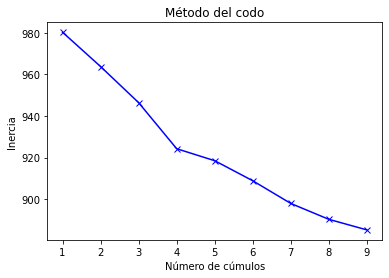

In [54]:
ks = []
kinertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'bx-');

### Punto 3: Entrenar modelo con el  𝐾  escogido

In [45]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [55]:
k_pt = 4
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"{color.BLUE}Cluster {i}:{color.END}")
    print(f"{color.CYAN}COUNT {color.END} {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{color.CYAN}TERMS {color.END}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{color.BOLD}{terms[ind]}{color.END}', end=" "),
    print(f"\n{color.CYAN}REPRESENTATIVE COMMENTS{color.END}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_title'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  911 comments (91.10% of the data)
TERMS  bien producto bonito juego buen bonitos pulsera mal bueno correcto recomiendo pendientes bonita regalo plata funciona pequeño decepción gran llegado 
REPRESENTATIVE COMMENTS
* Un 6 sobre 10
* ,,,,
* Todo 👌


Cluster 1:
COUNT  7 comments (0.70% of the data)
TERMS  genial regalar artículo producto perfecto pendientes bonitos pequeños llegó envío mando fina elegante vale caja preciosa pequeña gran perfectos regular 
REPRESENTATIVE COMMENTS
* Genial
* Genial!
* genial!!


Cluster 2:
COUNT  25 comments (2.50% of the data)
TERMS  perfecto contenta mando pequeño calidad bonito regalo compra mal llegado vale decepcionado excelente juegazo descontento fatal funda quizás ana entrega 
REPRESENTATIVE COMMENTS
* Perfecto
* Perfecto!!
* Perfecto


Cluster 3:
COUNT  57 comments (5.70% of the data)
TERMS  calidad buena precio mala compra relación bien buen producto cierre escasa comodos horrible mal perfectos vale gran excepcional i

In [56]:
clusters = {0:'Bueno',
            1:'Genial',
            2:'Perfecto',
            3:'Calidad'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
476,es_0117330,product_es_0671274,reviewer_es_0566147,5,"Muy contento con la compra, dispone de regulad...",Comodos y de Calidad.,es,video_games,Calidad
335,es_0428340,product_es_0467816,reviewer_es_0401471,2,"Se queda atascado, no van bien los controles.",Tirando a malo,es,video_games,Bueno


In [57]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides

,0,1,2,3,4,5,6,7,8,9,...,898,899,900,901,902,903,904,905,906,cluster
0,1.097695e-03,0.000713,0.000556,8.606910e-04,2.992386e-03,5.618426e-04,2.032291e-03,1.097695e-03,0.001255,1.097695e-03,...,9.460996e-04,7.761875e-04,8.538655e-04,1.116646e-03,0.000634,1.097695e-03,4.909041e-04,3.033354e-03,1.097695e-03,Bueno
1,0.000000e+00,0.000000,0.000000,1.084202e-19,0.000000e+00,0.000000e+00,2.168404e-19,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.084202e-19,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.421011e-20,4.336809e-19,0.000000e+00,Genial
2,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.336809e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.084202e-19,2.168404e-19,0.000000,0.000000e+00,5.421011e-20,0.000000e+00,0.000000e+00,Perfecto
3,-2.168404e-19,0.000000,0.000000,3.252607e-19,-1.301043e-18,1.084202e-19,4.336809e-19,-2.168404e-19,0.000000,-2.168404e-19,...,1.084202e-19,3.252607e-19,-1.084202e-19,2.168404e-19,0.000000,-2.168404e-19,1.626303e-19,8.673617e-19,-2.168404e-19,Calidad


In [100]:
import plotly.express as px
fig = px.imshow(data, color_continuous_scale=["red", "yellow", "green"])
fig.show()

## Parte 1: Clasificación

### Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"El cojunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El cojunto de datos de prueba tiene {test.shape[0]} registros")

El cojunto de datos de entrenamiento tiene 800 registros
El cojunto de datos de prueba tiene 200 registros


### Punto 2: Hacer pre-procesamiento del texto

In [74]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_title.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [77]:
X_train = tfidf_vect.fit_transform(train.review_title.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_title.values)
y_test = test.product_category.values

### Punto 3: Entrenar el modelo

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [79]:
# Inicializamos los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [80]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

In [81]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

### Punto 4: Métricas de evaluación

In [82]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [83]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.70
Regresión Logística:    0.69
SVM:                    0.68


In [89]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.65
Regresión Logística:    0.74
SVM:                    0.69

recall_score
Naive Bayes:            0.84
Regresión Logística:    0.57
SVM:                    0.61

f1_score
Naive Bayes:            0.73
Regresión Logística:    0.64
SVM:                    0.65



In [90]:
print(classification_report(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()
print("SVM")
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

     jewelry       0.65      0.84      0.73        97
 video_games       0.79      0.58      0.67       103

    accuracy                           0.70       200
   macro avg       0.72      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.74      0.57      0.64        97
 video_games       0.67      0.82      0.73       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200


SVM
              precision    recall  f1-score   support

     jewelry       0.69      0.61      0.65        97
 video_games       0.67      0.75      0.71       103

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68     

In [91]:
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print()
print("SVM")
print(confusion_matrix(y_test, y_pred_svm))

Naive Bayes
[[81 16]
 [43 60]]

Regresión Logística
[[55 42]
 [19 84]]

SVM
[[59 38]
 [26 77]]


## Parte 3: Comparación

### Punto 1: Hacer predicción para estas dos frases de los dos modelos

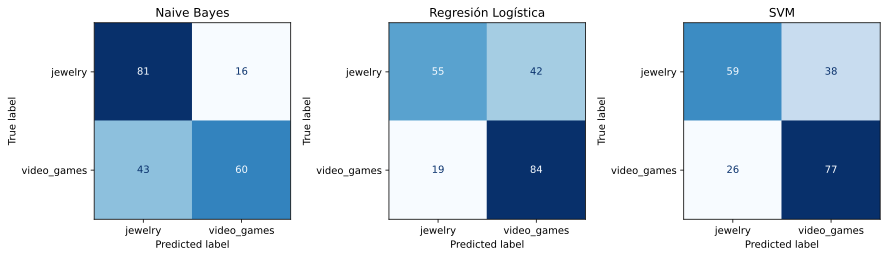

In [92]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

In [101]:
# Resultados
nuevo = ['jewelry']
nuevo_trans = tfidf_vect.transform(nuevo)
logreg.predict(nuevo_trans)

array(['video_games'], dtype=object)

In [94]:
# Explicación
vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}

In [95]:
[(vocab[e[0]],round(e[1],2)) for e in zip(nb.feature_log_prob_[0, :].argsort(),sorted(logreg.coef_[0]))][-10:]

[('plata', 0.81),
 ('perfecto', 0.82),
 ('precio', 0.85),
 ('buena', 0.86),
 ('pendientes', 0.88),
 ('pulsera', 1.04),
 ('bonitos', 1.09),
 ('bonito', 1.14),
 ('bien', 1.36),
 ('calidad', 2.22)]

In [96]:
[(vocab[e[0]],round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))][:10]

[('bonito', -2.03),
 ('pulsera', -1.94),
 ('bonitos', -1.79),
 ('pendientes', -1.59),
 ('calidad', -1.54),
 ('plata', -1.48),
 ('pequeños', -1.23),
 ('contenta', -1.22),
 ('precioso', -1.15),
 ('bonita', -1.1)]

## Punto 2: Preguntas

### ¿A cuál modelo le fue mejor?

Teniendo en cuenta que los datos no tienen etiquetas definidas y que la acertividad mostrada con el modelo de 𝐾 -Means es hasta del 84% se define que el mejor modelo es el supervisado

## ¿Cuál modelo se demoró más en entrenar?

 𝐾 -Means

## Según los resultados del  𝐾 -Means, ¿cuál es la estructura latente de los datos?

Que la satisfaccion del cliente esta medida por el numero de estrellas que asigna el usuario al generar la compra

## ¿Alguna otra observación?

De acuerdo con con los datos los clientes parecen estar en conformidad con los productos adquiridos